In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random

In [45]:
expression = pd.read_pickle('pca_BEC.pkl')

In [46]:
expression = expression.transpose()

In [47]:
expression
#105 columns (samples)
#86 rows (genes)

#we are clustering the columns (the samples)

,0,1,2,3,4,5,6,7,8,9,...,145,146,147,148,149,150,151,152,153,154
0,-4.491788,-0.247952,30.366253,9.235560,4.092252,-24.725583,-9.605614,15.402810,-20.711211,3.817060,...,22.564300,-4.238394,21.472586,-19.254027,-14.743681,23.626636,2.638673,-0.623668,-4.350568,-9.527605
1,-1.810301,10.917960,-13.849804,13.007210,0.279673,-2.031198,0.528458,-17.250108,0.352463,34.268300,...,2.763876,5.821208,29.743857,12.260244,-23.685837,11.675992,21.723403,1.944806,-10.293244,15.141604
2,-14.825745,-13.991187,-1.079152,-22.206073,-12.418187,-4.256539,0.644793,18.081710,12.318828,25.805837,...,-25.875962,-26.944100,40.855472,7.331797,-11.963862,16.124489,-4.042543,7.006846,-15.748726,13.004823
3,-0.712293,3.618313,1.173603,-7.015018,-9.459934,10.370338,11.852100,15.489843,-5.259634,-9.280370,...,-11.778718,-29.673512,1.306037,1.562984,2.822074,-6.094992,26.414538,6.072443,21.247850,-16.595114
4,-15.092162,-1.716893,7.798225,-11.658398,-12.661872,6.777323,-6.612333,-2.427383,-3.047598,0.256898,...,20.549139,-11.987641,-10.596450,9.382938,-19.468780,7.688479,4.249517,8.076386,-23.393582,-11.718785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,7.681811,-2.871706,-2.509613,2.555962,-2.224343,-2.362217,-3.275820,0.224145,-1.285511,3.246114,...,-0.805133,0.328848,-0.389281,1.886142,2.075767,1.364171,3.807432,-2.389174,-0.324696,-1.003008
107,0.109591,1.468305,-4.213679,-0.463932,1.336324,-0.993149,2.490636,0.826305,-2.269898,1.291903,...,-1.581600,1.024723,1.176680,1.207714,0.568310,-0.596234,0.381903,2.613679,-0.831104,1.457989
108,5.176853,-0.325253,-0.819150,-1.531681,3.303347,-1.530538,-0.160915,-0.909196,-0.232851,2.381509,...,-0.992858,-1.951427,0.427666,2.629074,-1.119679,-0.062469,4.071057,-2.645739,0.318897,-3.413627
109,2.103464,1.146314,-0.548085,0.018381,-3.577983,0.517526,3.435985,0.767029,-0.696055,2.494559,...,-0.775468,1.980229,0.653504,2.589409,-0.311754,-1.505517,-0.313283,0.490243,-2.747806,-3.953421


In [48]:
#input: expression data, initializations, k
#ouput: objective list, k clusters (lists of expression column names)

def KMeans(k, expressionData, centroids):
    #objective list to track convergence
    objectiveList = [2, 3]
    
    while objectiveList[-1] != objectiveList[-2]:
        #first, assign initial clusters
        clusters = get_clusters(k, expressionData, centroids)
    
        #calculate objective and add to objective list
        objective = calc_objective(clusters, expressionData, centroids)
        objectiveList.append(objective)
    
        #calculate new means and update centroids
        centroids = calc_means(clusters, expressionData)
    
    return objectiveList[2:], clusters

In [49]:
def get_clusters(k, expressionData, centroids):
    if k != len(centroids.columns):
        print('ERROR: num centroids does not correspond with num clusters')
    
    clusters = np.empty((k, 0)).tolist()
    for expCol in expressionData:
        #distances holds distances of column to each centroid
        distances = []
        
        for centCol in centroids:
            distance = get_dist(centroids[centCol], expressionData[expCol])
            distances.append(distance)
        
        closest_centroid = distances.index(min(distances))
        clusters[closest_centroid].append(expCol)
    return clusters
            

In [50]:
def get_dist(point1, point2):
    dist = np.sqrt(sum((point1 - point2) ** 2))
    return dist

In [51]:
def calc_objective(clusters, expressionData, centroids):
    total_distances = []
    
    for cluster in range(len(clusters)):
        #for each cluster
        cluster_distances = [] #initialize distances array to hold distances from every point in cluster to centroid 
        
        for val in clusters[cluster]:
            #for every point in cluster
            dist = (get_dist(centroids[cluster], expressionData[val]))**2 #get distance from point to centroid
            cluster_distances.append(dist) #append to list
        
        #sum distances for the cluster
        sum_one_cluster = sum(cluster_distances)
        total_distances.append(sum_one_cluster)
    
    return sum(total_distances)

In [52]:
def calc_means(clusters, expressionData):
    means = pd.DataFrame()
    
    new_centroid = [0]
    for cluster in clusters:
        #at first cluster
        for val in cluster:
            new_centroid += expressionData[val]
        
        new_centroid = new_centroid / len(cluster)
        
        means = pd.concat([means, new_centroid], axis=1, ignore_index=True)

    return means

In [53]:
def create_rand_centroids(rand_inds):
    rand_centroids = pd.DataFrame()
    
    for i in rand_inds:
        rand_centroids = pd.concat([rand_centroids, expression[i]], axis=1, ignore_index=True)
    
    return rand_centroids

In [54]:
def clustered_expression(clusters):
    new_exp = pd.DataFrame()
    for cluster in clusters:
        for val in cluster:
            new_exp = pd.concat([new_exp, expression[val]], axis=1, ignore_index=True)
    return new_exp

## 4d) K=3 to K=12, 10 Random Inits each

In [55]:
all_min_objs = []

### K=3

In [56]:
ten_objectives = []
ten_clusters = []

for i in range(10):
    #get random centroids
    rand_inds = random.sample(range(0, len(expression)), 3)
    #create centroid dataframe 
    rand_centroids = create_rand_centroids(rand_inds)
    
    #run KMeans
    objectives, clusters = KMeans(k=3, expressionData=expression, centroids=rand_centroids)
    
    #add objective to objective list
    ten_objectives.append(objectives[-1])
    
    #add clusters to clusterlist
    ten_clusters.append(clusters)

In [57]:
min_idx = ten_objectives.index(min(ten_objectives))
print("objective: ", ten_objectives[min_idx])
all_min_objs.append(ten_objectives[min_idx])

objective:  421272.61645254376


<AxesSubplot:>

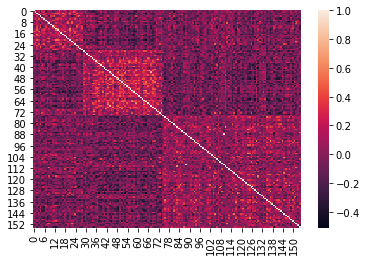

In [58]:
new_exp = clustered_expression(ten_clusters[min_idx])
new_corr = new_exp.corr()
sns.heatmap(new_corr)

### K = 4

In [59]:
ten_objectives = []
ten_clusters = []

for i in range(10):
    #get random centroids
    rand_inds = random.sample(range(0, len(expression)), 4)
    #create centroid dataframe 
    rand_centroids = create_rand_centroids(rand_inds)
    
    #run KMeans
    objectives, clusters = KMeans(k=4, expressionData=expression, centroids=rand_centroids)
    
    #add objective to objective list
    ten_objectives.append(objectives[-1])
    
    #add clusters to clusterlist
    ten_clusters.append(clusters)

In [60]:
min_idx = ten_objectives.index(min(ten_objectives))
print("objective: ", ten_objectives[min_idx])
all_min_objs.append(ten_objectives[min_idx])

objective:  404952.40249476105


<AxesSubplot:>

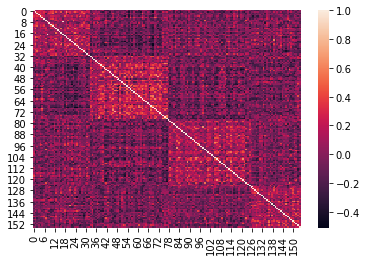

In [61]:
new_exp = clustered_expression(ten_clusters[min_idx])
new_corr = new_exp.corr()
sns.heatmap(new_corr)

### K = 5

In [62]:
ten_objectives = []
ten_clusters = []

for i in range(10):
    #get random centroids
    rand_inds = random.sample(range(0, len(expression)), 5)
    #create centroid dataframe 
    rand_centroids = create_rand_centroids(rand_inds)
    
    #run KMeans
    objectives, clusters = KMeans(k=5, expressionData=expression, centroids=rand_centroids)
    
    #add objective to objective list
    ten_objectives.append(objectives[-1])
    
    #add clusters to clusterlist
    ten_clusters.append(clusters)

In [63]:
min_idx = ten_objectives.index(min(ten_objectives))
print("objective: ", ten_objectives[min_idx])
all_min_objs.append(ten_objectives[min_idx])

objective:  394487.2037716217


<AxesSubplot:>

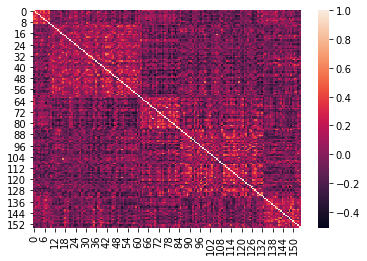

In [64]:
new_exp = clustered_expression(ten_clusters[min_idx])
new_corr = new_exp.corr()
sns.heatmap(new_corr)

### K = 6

In [65]:
ten_objectives = []
ten_clusters = []

for i in range(10):
    #get random centroids
    rand_inds = random.sample(range(0, len(expression)), 6)
    #create centroid dataframe 
    rand_centroids = create_rand_centroids(rand_inds)
    
    #run KMeans
    objectives, clusters = KMeans(k=6, expressionData=expression, centroids=rand_centroids)
    
    #add objective to objective list
    ten_objectives.append(objectives[-1])
    
    #add clusters to clusterlist
    ten_clusters.append(clusters)

In [66]:
min_idx = ten_objectives.index(min(ten_objectives))
print("objective: ", ten_objectives[min_idx])
all_min_objs.append(ten_objectives[min_idx])

objective:  382046.288216454


<AxesSubplot:>

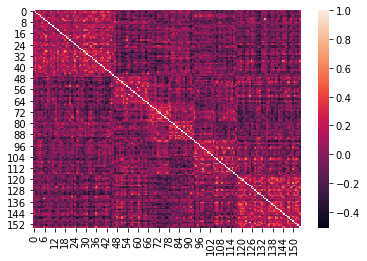

In [67]:
new_exp = clustered_expression(ten_clusters[min_idx])
new_corr = new_exp.corr()
sns.heatmap(new_corr)

### K = 7

In [68]:
ten_objectives = []
ten_clusters = []

for i in range(10):
    #get random centroids
    rand_inds = random.sample(range(0, len(expression)), 7)
    #create centroid dataframe 
    rand_centroids = create_rand_centroids(rand_inds)
    
    #run KMeans
    objectives, clusters = KMeans(k=7, expressionData=expression, centroids=rand_centroids)
    
    #add objective to objective list
    ten_objectives.append(objectives[-1])
    
    #add clusters to clusterlist
    ten_clusters.append(clusters)

In [69]:
min_idx = ten_objectives.index(min(ten_objectives))
print("objective: ", ten_objectives[min_idx])
all_min_objs.append(ten_objectives[min_idx])

objective:  373937.50306603836


<AxesSubplot:>

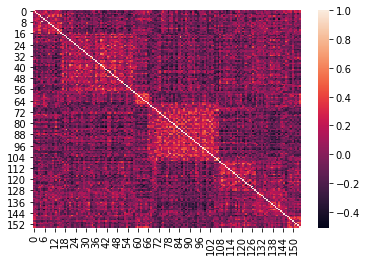

In [70]:
new_exp = clustered_expression(ten_clusters[min_idx])
new_corr = new_exp.corr()
sns.heatmap(new_corr)

### K = 8

In [71]:
ten_objectives = []
ten_clusters = []

for i in range(10):
    #get random centroids
    rand_inds = random.sample(range(0, len(expression)), 8)
    #create centroid dataframe 
    rand_centroids = create_rand_centroids(rand_inds)
    
    #run KMeans
    objectives, clusters = KMeans(k=8, expressionData=expression, centroids=rand_centroids)
    
    #add objective to objective list
    ten_objectives.append(objectives[-1])
    
    #add clusters to clusterlist
    ten_clusters.append(clusters)

In [72]:
min_idx = ten_objectives.index(min(ten_objectives))
print("objective: ", ten_objectives[min_idx])
all_min_objs.append(ten_objectives[min_idx])

objective:  365071.1373829049


<AxesSubplot:>

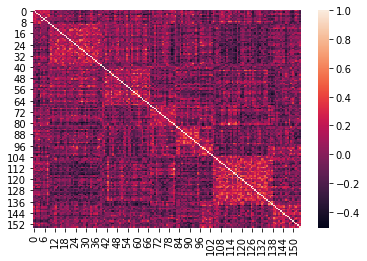

In [73]:
new_exp = clustered_expression(ten_clusters[min_idx])
new_corr = new_exp.corr()
sns.heatmap(new_corr)

### K = 9

In [74]:
ten_objectives = []
ten_clusters = []

for i in range(10):
    #get random centroids
    rand_inds = random.sample(range(0, len(expression)), 9)
    #create centroid dataframe 
    rand_centroids = create_rand_centroids(rand_inds)
    
    #run KMeans
    objectives, clusters = KMeans(k=9, expressionData=expression, centroids=rand_centroids)
    
    #add objective to objective list
    ten_objectives.append(objectives[-1])
    
    #add clusters to clusterlist
    ten_clusters.append(clusters)

In [75]:
min_idx = ten_objectives.index(min(ten_objectives))
print("objective: ", ten_objectives[min_idx])
all_min_objs.append(ten_objectives[min_idx])

objective:  362450.16036353726


<AxesSubplot:>

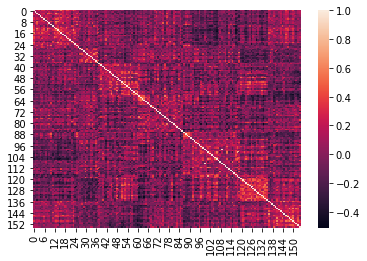

In [76]:
new_exp = clustered_expression(ten_clusters[min_idx])
new_corr = new_exp.corr()
sns.heatmap(new_corr)

### K = 10

In [77]:
ten_objectives = []
ten_clusters = []

for i in range(10):
    #get random centroids
    rand_inds = random.sample(range(0, len(expression)), 10)
    #create centroid dataframe 
    rand_centroids = create_rand_centroids(rand_inds)
    
    #run KMeans
    objectives, clusters = KMeans(k=10, expressionData=expression, centroids=rand_centroids)
    
    #add objective to objective list
    ten_objectives.append(objectives[-1])
    
    #add clusters to clusterlist
    ten_clusters.append(clusters)

In [78]:
min_idx = ten_objectives.index(min(ten_objectives))
print("objective: ", ten_objectives[min_idx])
all_min_objs.append(ten_objectives[min_idx])

objective:  353220.656067362


<AxesSubplot:>

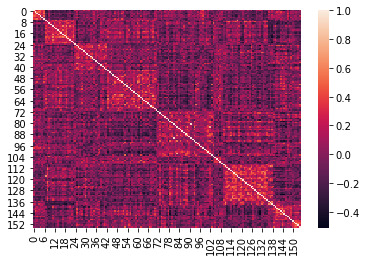

In [79]:
new_exp = clustered_expression(ten_clusters[min_idx])
new_corr = new_exp.corr()
sns.heatmap(new_corr)

### K = 11

In [80]:
ten_objectives = []
ten_clusters = []

for i in range(10):
    #get random centroids
    rand_inds = random.sample(range(0, len(expression)), 11)
    #create centroid dataframe 
    rand_centroids = create_rand_centroids(rand_inds)
    
    #run KMeans
    objectives, clusters = KMeans(k=11, expressionData=expression, centroids=rand_centroids)
    
    #add objective to objective list
    ten_objectives.append(objectives[-1])
    
    #add clusters to clusterlist
    ten_clusters.append(clusters)

In [81]:
min_idx = ten_objectives.index(min(ten_objectives))
print("objective: ", ten_objectives[min_idx])
all_min_objs.append(ten_objectives[min_idx])

objective:  351631.9083681728


<AxesSubplot:>

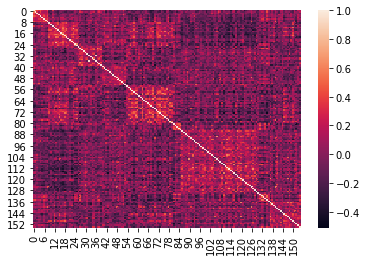

In [82]:
new_exp = clustered_expression(ten_clusters[min_idx])
new_corr = new_exp.corr()
sns.heatmap(new_corr)

### K = 12

In [83]:
ten_objectives = []
ten_clusters = []

for i in range(10):
    #get random centroids
    rand_inds = random.sample(range(0, len(expression)), 12)
    #create centroid dataframe 
    rand_centroids = create_rand_centroids(rand_inds)
    
    #run KMeans
    objectives, clusters = KMeans(k=12, expressionData=expression, centroids=rand_centroids)
    
    #add objective to objective list
    ten_objectives.append(objectives[-1])
    
    #add clusters to clusterlist
    ten_clusters.append(clusters)

In [84]:
min_idx = ten_objectives.index(min(ten_objectives))
print("objective: ", ten_objectives[min_idx])
all_min_objs.append(ten_objectives[min_idx])

objective:  347679.1626030715


<AxesSubplot:>

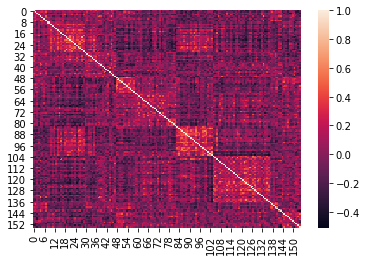

In [85]:
new_exp = clustered_expression(ten_clusters[min_idx])
new_corr = new_exp.corr()
sns.heatmap(new_corr)

## Plotting

In [86]:
all_min_objs

[421272.61645254376,
 404952.40249476105,
 394487.2037716217,
 382046.288216454,
 373937.50306603836,
 365071.1373829049,
 362450.16036353726,
 353220.656067362,
 351631.9083681728,
 347679.1626030715]

Text(0, 0.5, 'Objective')

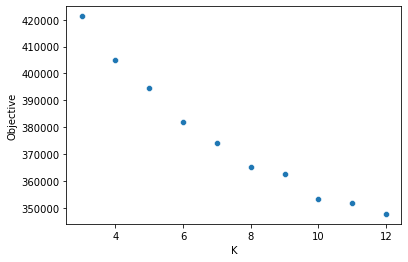

In [87]:
sns.scatterplot(x = range(3,13), y = all_min_objs)
plt.xlabel('K')
plt.ylabel('Objective')